In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Mnist dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


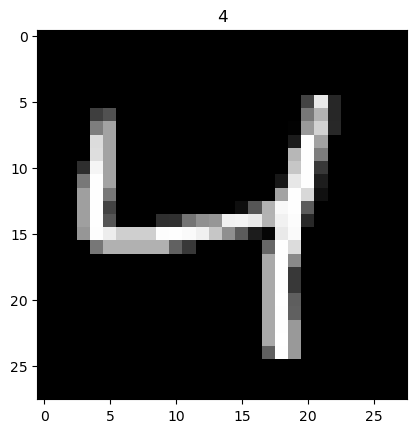

In [9]:
# plot one example
print(train_data.data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [10]:
# Data loader, the batch shape is (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

In [11]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 28*28),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
       h = self.encoder(x)
       r = self.decoder(h)
       return h, r
                   

In [12]:
ae = AutoEncoder()
#print(ae)
optim = torch.optim.Adam(ae.parameters(), lr=0.005)
loss_func = nn.MSELoss()

# original image for plot
view_data = Variable(train_data.data[:5].view(-1, 28*28).type(torch.FloatTensor)/255.)

for epoch in range(10):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))
        b_y = Variable(x.view(-1, 28*28))
        #b_label = Variable(y)
        
        
        encoded, decoded = ae(b_x)
        loss = loss_func(decoded, b_label)
       
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        
        
        if step % 500 == 0 and epoch in [0, 5, 9]:
            print('epoch: {}| train loss: {:.4}'.format(epoch, loss))
            
            # plotting decoded image (second row)
            _, decoded_data = ae(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, 5, figsize=(5,2))
            
            for i in range(5):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)),
                              cmap='gray')
                a[0][i].set_xticks(())
                
            for i in range(5):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)),
                              cmap='gray')
                
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
            plt.show()
            plt.pause(0.05)

RuntimeError: shape '[-1, 784]' is invalid for input of size 50